# Clasificación

Empezaremos con código que nos asegura que todo saldrá bien

In [30]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

En este caso usaremos la base de datos MNIST el cual contiene alrededor de 70,000 pequeñas imagenes de digitos escritos por alumnos de preparatoria

Scikit-Learn provee una funcion para descargarlo

In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Notemos que la llave DESCR describe el dataset

la lave data contiene una columna por

In [35]:
X, y = mnist["data"], mnist["target"]
print("Las dimensiones de X son: " + str(X.shape))
print("Las dimensiones de y son: " + str(y.shape))

Las dimensiones de X son: (70000, 784)
Las dimensiones de y son: (70000,)


Notemos que hay 70,000 imagenes y cada una tiene 784 caracteristicas. Esto es por que cada imagen tiene 28x28 pixeles y cada uno representa su intensidad, de 0 (blanco) al 255 (Negro). 

Saving figure some_digit_plot


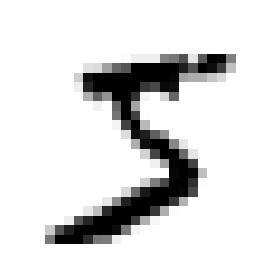

In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

Corroboremos que digito es

In [37]:
y[0]


'5'

Notemos que el resultado es una cadena de caracteres, muchos algoritmos esperan numeros, por lo que haremos la conversión

In [38]:
y=y.astype(np.uint8)

Separamos los datos en datos de entrenamiento y de comprobación

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],
y[60000:]

# Entrenando un clasificador binario
